In [5]:
import pandas as pd

df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')
  # Update with your actual path
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

df['message'] = df['message'].apply(clean_text)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Binary labels


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['message'])
y = df['label']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": LinearSVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n✅ {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    results.append({

        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })


✅ Naive Bayes
Accuracy: 0.9668161434977578
Confusion Matrix:
 [[965   0]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


✅ Logistic Regression
Accuracy: 0.9399103139013453
Confusion Matrix:
 [[963   2]
 [ 65  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.98      0.57      0.72       150

    accuracy                           0.94      1115
   macro avg       0.96      0.78      0.84      1115
weighted avg       0.94      0.94      0.93      1115


✅ Support Vector Machine
Accuracy: 0.9739910313901345
Confusion Matrix:
 [[962   3]
 [ 26 124]]
Classification Report

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


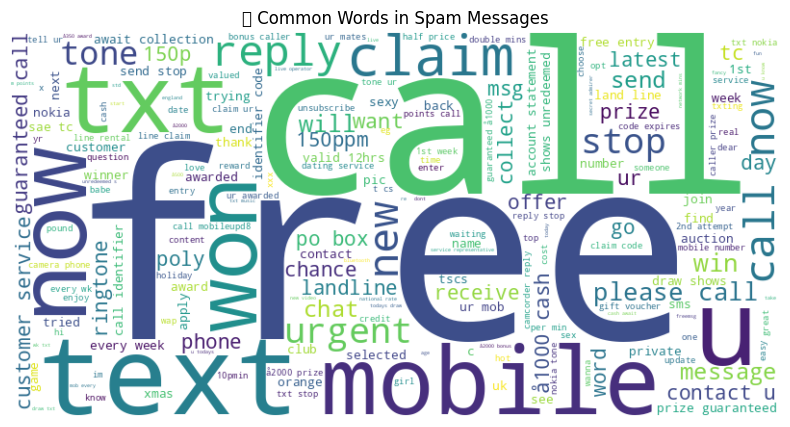

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(df[df['label'] == 1]['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🚨 Common Words in Spam Messages")
plt.show()


/tmp/ipython-input-15-2701971903.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


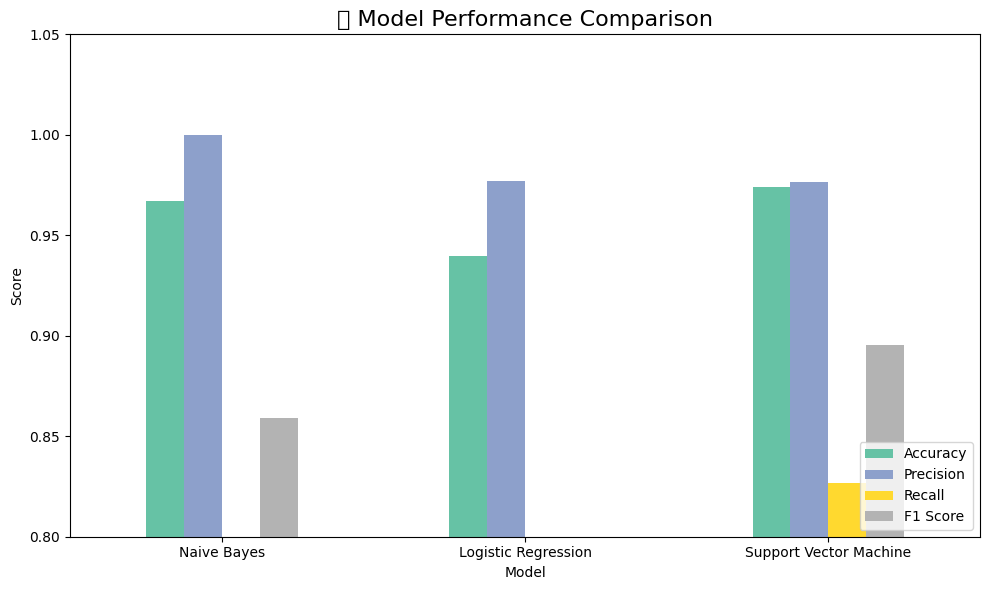

In [15]:
metrics_df = pd.DataFrame(results)

metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("📊 Model Performance Comparison", fontsize=16)
plt.ylabel("Score")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()